In [1]:
import os
import tensorflow as tf
import glob
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

figsize=(5.7, 3)
export_dir = os.path.join('soln_pdf', 'figures')
data_dir = os.path.join('data')

sns.set_theme()
sns.set_context("paper")

In [2]:
def get_section_results(file, *tags):
    """
        requires tensorflow==1.12.0
    """
    data_dict = {tag: [] for tag in tags}
    for e in tf.compat.v1.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag in data_dict:
                data_dict[v.tag].append(v.simple_value)
    data_dict = {tag: np.array(data_dict[tag]) for tag in data_dict}
    return data_dict

## Problem 2

In [3]:
def read_q2_data(batches, tags):
    full_data = pd.DataFrame()

    for folder in os.listdir(data_dir):
        split = [s.strip() for s in folder.split('_')]
        # print(split)
        if all([b in split for b in batches]):
            config_list = split[split.index(batches[0]):-2]
            # print('_'.join(config))
            config = '_'.join(config_list)

            logdir = os.path.join(data_dir, folder, 'events*')
            print(logdir)
            eventfile = glob.glob(logdir)[0]

            data_dict = get_section_results(eventfile, *tags)
            idx = 'Train_EnvstepsSoFar'
            
            '''
            for key in data_dict:
                while len(data_dict[key]) < len(data_dict[idx]):
                    data_dict[key] = np.insert(data_dict[key], 0, None)'''
            
            data = pd.DataFrame({'Iteration': range(len(data_dict[idx])), 
                                 'Config': np.repeat(config, len(data_dict[idx])), 
                                 **data_dict})
            #data['Eval_AverageReturn_Smooth'] = data['Eval_AverageReturn'].ewm(alpha=0.6).mean()
            full_data = pd.concat([full_data, data], axis=0, ignore_index=True)

    return full_data

q2_data = read_q2_data(['q2'], ['Train_EnvstepsSoFar', 'Train_AverageReturn', 'Eval_AverageReturn'])
q2_longform = q2_data.drop('Config', axis=1).melt(id_vars=['Iteration'], value_vars=['Train_AverageReturn', 'Eval_AverageReturn'])
q2_longform

data/hw4_q2_obstacles_singleiteration_obstacles-cs285-v0_16-12-2020_10-55-06/events*
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


,Iteration,variable,value
0,0,Train_AverageReturn,-172.418655
1,0,Eval_AverageReturn,-29.397200


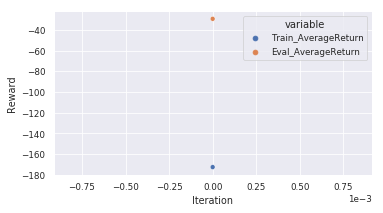

In [4]:
plt.figure(figsize=figsize)
ax = sns.scatterplot(data=q2_longform, x='Iteration', y='value', hue='variable')
ax.set(xlabel='Iteration', ylabel='Reward')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.savefig(os.path.join(export_dir, 'q2.pdf'), bbox_inches='tight')

## Problem 3

In [5]:
def read_q3_data(batches, tags):
    full_data = pd.DataFrame()

    for folder in os.listdir(data_dir):
        split = [s.strip() for s in folder.split('_')]
        # print(split)
        if all([b in split for b in batches]):
            config_list = split[split.index(batches[0]):-2]
            # print('_'.join(config))
            config = '_'.join(config_list)

            logdir = os.path.join(data_dir, folder, 'events*')
            print(logdir)
            eventfile = glob.glob(logdir)[0]

            data_dict = get_section_results(eventfile, *tags)
            idx = 'Train_EnvstepsSoFar'
            
            '''
            for key in data_dict:
                while len(data_dict[key]) < len(data_dict[idx]):
                    data_dict[key] = np.insert(data_dict[key], 0, None)'''
            
            data = pd.DataFrame({'Iteration': range(len(data_dict[idx])), 
                                 'Config': np.repeat(config, len(data_dict[idx])), 
                                 **data_dict})
            data['Eval_AverageReturn_Smooth'] = data['Eval_AverageReturn'].ewm(alpha=0.6).mean()
            full_data = pd.concat([full_data, data], axis=0, ignore_index=True)

    return full_data

q3_data = read_q3_data(['q3'], ['Train_EnvstepsSoFar', 'Eval_AverageReturn'])
q3_data

data/hw4_q3_obstacles_obstacles-cs285-v0_16-12-2020_10-59-11/events*
data/hw4_q3_reacher_reacher-cs285-v0_16-12-2020_11-02-57/events*
data/hw4_q3_cheetah_cheetah-cs285-v0_16-12-2020_11-06-04/events*


,Iteration,Config,Train_EnvstepsSoFar,Eval_AverageReturn,Eval_AverageReturn_Smooth
0,0,q3_obstacles_obstacles-cs285-v0,5092.0,-29.397200,-29.397200
1,1,q3_obstacles_obstacles-cs285-v0,6099.0,-36.093922,-34.180573
2,2,q3_obstacles_obstacles-cs285-v0,7146.0,-29.112761,-30.931975
3,3,q3_obstacles_obstacles-cs285-v0,8221.0,-28.817072,-29.629695
4,4,q3_obstacles_obstacles-cs285-v0,9269.0,-30.853239,-30.371417
5,5,q3_obstacles_obstacles-cs285-v0,10307.0,-30.994463,-30.746782
6,6,q3_obstacles_obstacles-cs285-v0,11318.0,-47.398994,-40.754506
7,7,q3_obstacles_obstacles-cs285-v0,12324.0,-37.111889,-38.567502
8,8,q3_obstacles_obstacles-cs285-v0,13333.0,-23.178129,-29.331457
9,9,q3_obstacles_obstacles-cs285-v0,14337.0,-39.682980,-35.543022


In [6]:
q3_cheetah_data = q3_data.loc[q3_data['Config'] == 'q3_cheetah_cheetah-cs285-v0']
q3_obstacles_data = q3_data.loc[q3_data['Config'] == 'q3_obstacles_obstacles-cs285-v0']
q3_reacher_data = q3_data.loc[q3_data['Config'] == 'q3_reacher_reacher-cs285-v0']

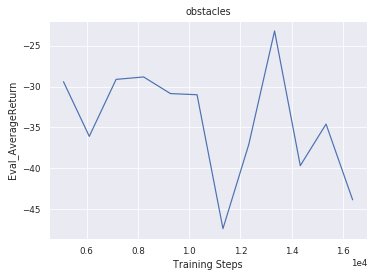

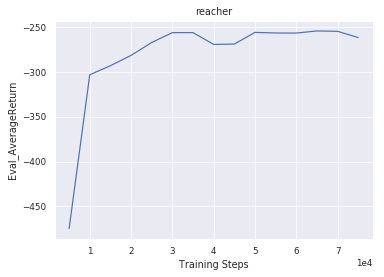

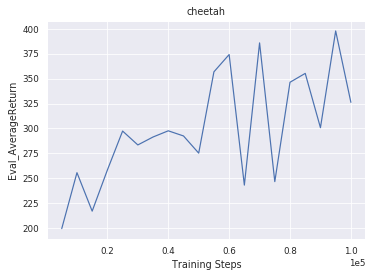

In [11]:
for c in q3_data.Config.unique():
    name = c.split('_')[1]
    plt.figure(figsize=(5.7, 4))
    ax = sns.lineplot(data=q3_data.loc[q3_data['Config'] == c], x='Train_EnvstepsSoFar', y='Eval_AverageReturn')
    ax.set(xlabel='Training Steps', ylabel='Eval_AverageReturn')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.title(name)
    plt.savefig(os.path.join(export_dir, f'q3_{name}.pdf'), bbox_inches='tight')

## Problem 4

In [8]:
def read_q4_data(batches, tags):
    full_data = pd.DataFrame()

    for folder in os.listdir(data_dir):
        split = [s.strip() for s in folder.split('_')]
        # print(split)
        if all([b in split or any([s.startswith(b) for s in split]) for b in batches]):
            config_list = split[split.index(batches[0]):-2]
            # print('_'.join(config))
            config = '_'.join(config_list)

            logdir = os.path.join(data_dir, folder, 'events*')
            print(logdir)
            eventfile = glob.glob(logdir)[0]

            data_dict = get_section_results(eventfile, *tags)
            idx = 'Train_EnvstepsSoFar'
            
            '''
            for key in data_dict:
                while len(data_dict[key]) < len(data_dict[idx]):
                    data_dict[key] = np.insert(data_dict[key], 0, None)'''
            
            data = pd.DataFrame({'Iteration': range(len(data_dict[idx])), 
                                 'Config': np.repeat(config, len(data_dict[idx])), 
                                 **data_dict})
            data['Eval_AverageReturn_Smooth'] = data['Eval_AverageReturn'].ewm(alpha=0.6).mean()
            full_data = pd.concat([full_data, data], axis=0, ignore_index=True)

    return full_data

data/hw4_q4_reacher_horizon30_reacher-cs285-v0_18-12-2020_19-50-09/events*
data/hw4_q4_reacher_horizon5_reacher-cs285-v0_18-12-2020_19-49-20/events*
data/hw4_q4_reacher_horizon15_reacher-cs285-v0_18-12-2020_19-49-54/events*
data/hw4_q4_reacher_numseq100_reacher-cs285-v0_18-12-2020_20-24-13/events*
data/hw4_q4_reacher_numseq1000_reacher-cs285-v0_18-12-2020_20-24-20/events*
data/hw4_q4_reacher_ensemble3_reacher-cs285-v0_18-12-2020_20-43-34/events*
data/hw4_q4_reacher_ensemble5_reacher-cs285-v0_18-12-2020_20-43-42/events*
data/hw4_q4_reacher_ensemble1_reacher-cs285-v0_18-12-2020_20-42-41/events*


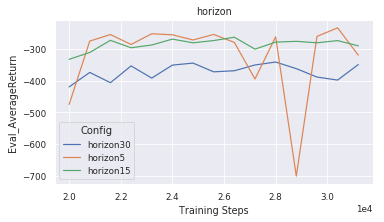

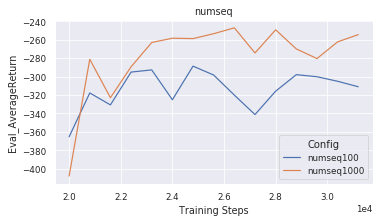

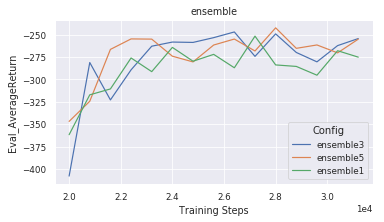

In [9]:
params = ['horizon', 'numseq', 'ensemble']
for p in params:
    q4_param_data = read_q4_data(['q4', p], ['Train_EnvstepsSoFar', 'Eval_AverageReturn'])
    q4_param_data.Config = q4_param_data.Config.apply(lambda x: x.split('_')[2])

    plt.figure(figsize=figsize)
    ax = sns.lineplot(data=q4_param_data, x='Train_EnvstepsSoFar', y='Eval_AverageReturn', hue='Config')
    ax.set(xlabel='Training Steps', ylabel='Eval_AverageReturn')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    
    plt.title(p)
    plt.savefig(os.path.join(export_dir, f'q4_{p}.pdf'), bbox_inches='tight')